In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

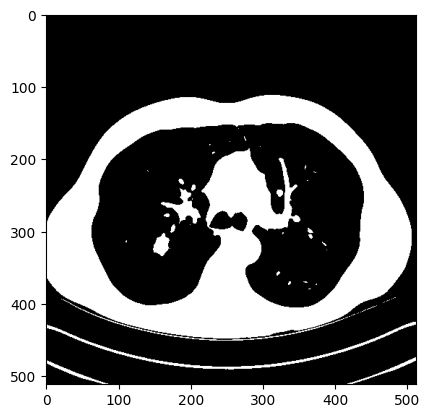

In [ ]:
import numpy as np
img= cv2.imread("lung_img.jpg",0)

threshold_value = 127 #@param {type:"slider", min:0, max:255, step:1}

# Apply variable thresholding
img[img > threshold_value] = 255
img[img <= threshold_value] = 0
plt.imshow(img,cmap='gray')

# Threshold

In [ ]:
#Global Thresholding

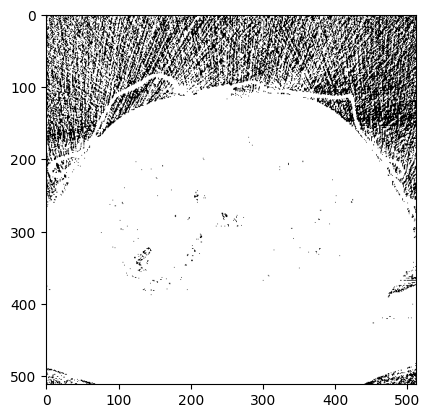

In [ ]:
import numpy as np
img= cv2.imread("lung_img.jpg",0)

ret,thresh1 = cv2.threshold(img,threshold_value,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')


In [ ]:
#Adaptive Thresholding

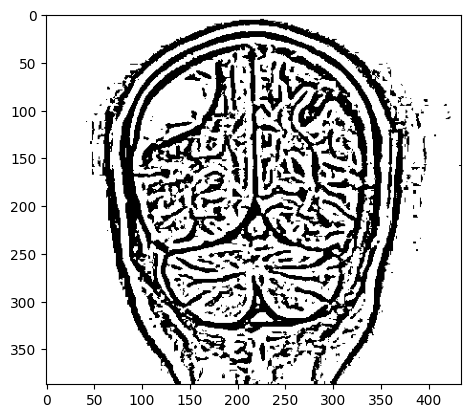

In [ ]:
image = cv2.imread("mri_tumor1.jpg",0)
adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive,cmap='gray')

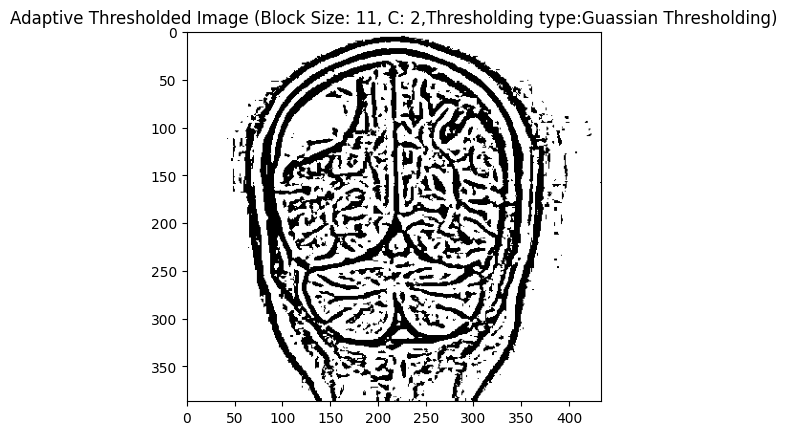

"\n# Apply adaptive thresholding\nadaptive_thresh = cv2.adaptiveThreshold(img, 255,threshold_type, cv2.THRESH_BINARY, block_size, C)\n\n# Display the thresholded image\nplt.imshow(adaptive_thresh, cmap='gray')\nplt.title(f'Adaptive Thresholded Image (Block Size: {block_size}, C: {C})')\nplt.show()\n"

In [ ]:
# Input text field for block size
block_size = 11  #@param {type:"slider", min:3, max:50, step:2}

# Input text field for C value
C = 4  #@param {type:"slider", min:0, max:10, step:1}

threshold_type = "Guassian Thresholding" #@param ["Guassian Thresholding", "Mean Thresholding"]
if threshold_type == "Mean Thresholding":
    adaptive_thresh = cv2.adaptiveThreshold(img, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C)
elif threshold_type == "Guassian Thresholding":
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                                     cv2.THRESH_BINARY, block_size, C)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title(f'Adaptive Thresholded Image (Block Size: {block_size}, C: {C},Thresholding type:{threshold_type})')
plt.show()


'''
# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(img, 255,threshold_type, cv2.THRESH_BINARY, block_size, C)

# Display the thresholded image
plt.imshow(adaptive_thresh, cmap='gray')
plt.title(f'Adaptive Thresholded Image (Block Size: {block_size}, C: {C})')
plt.show()
'''

In [ ]:
#Otsu thresholding

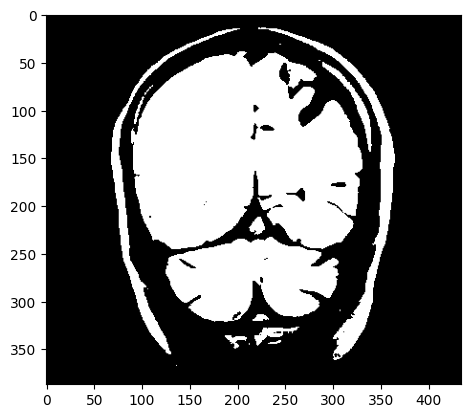

In [ ]:
img = cv2.imread('mri_tumor1.jpg',0)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2,cmap='gray')

Text(0.5, 1.0, 'Otsu Thresholding')

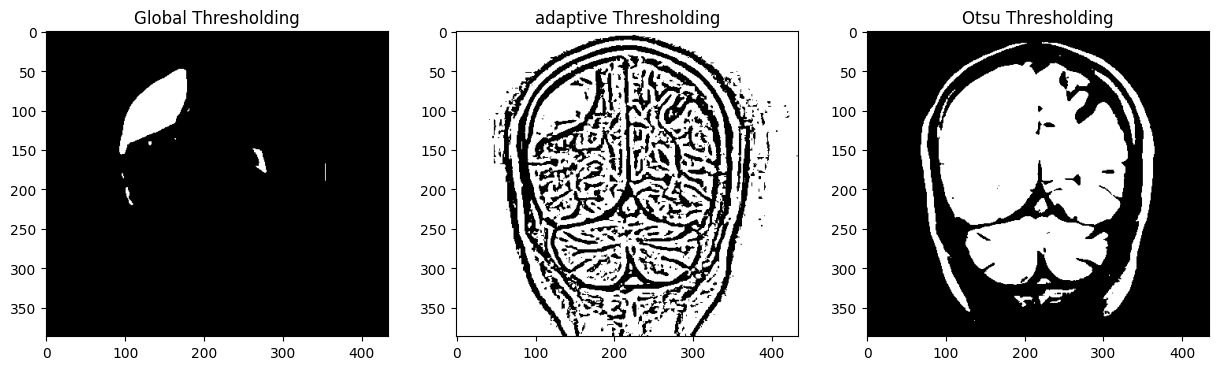

In [ ]:
# Display the results
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(thresh1, cmap='gray')
plt.title('Global Thresholding')

plt.subplot(1, 3, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('adaptive Thresholding')

plt.subplot(1, 3, 3)
plt.imshow(th2, cmap='gray')
plt.title('Otsu Thresholding')

#Region Based Segmentation

# Region Growing

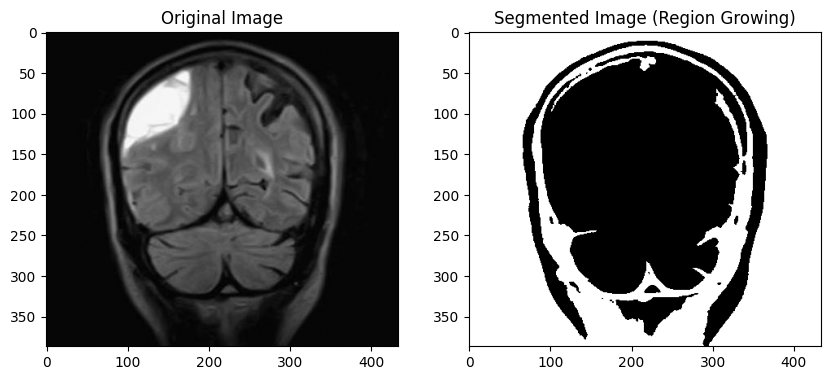

In [ ]:
# prompt: provide python code for region growing

import cv2
import numpy as np

def region_growing(image, seed_point, threshold):
    rows, cols = image.shape[:2]
    segmented = np.zeros_like(image)
    visited = np.zeros_like(image)

    seed_queue = [seed_point]
    visited[seed_point[0], seed_point[1]] = 1
    segmented[seed_point[0], seed_point[1]] = 255  # Assign a value to the segmented image

    while seed_queue:
        pixel = seed_queue.pop(0)
        x, y = pixel[0], pixel[1]

        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue

                nx, ny = x + dx, y + dy

                if 0 <= nx < rows and 0 <= ny < cols and visited[nx, ny] == 0:
                    diff = abs(int(image[nx, ny]) - int(image[seed_point[0],seed_point[1]]))
                    if diff <= threshold:
                        visited[nx, ny] = 1
                        segmented[nx, ny] = 255
                        seed_queue.append((nx, ny))

    return segmented


# Example usage (assuming you have an image loaded as 'img'):
img = cv2.imread("mri_tumor1.jpg", 0)  # Load in grayscale

# Choose a seed point (x, y coordinates)
seed_point = (50, 50)  # Example seed point. Adjust based on your image.

# Set the threshold for region growing
threshold_value = 25 #@param {type:"slider", min:0, max:255, step:1}


segmented_image = region_growing(img, seed_point, threshold_value)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented Image (Region Growing)')

plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving lung_img.jpg to lung_img.jpg


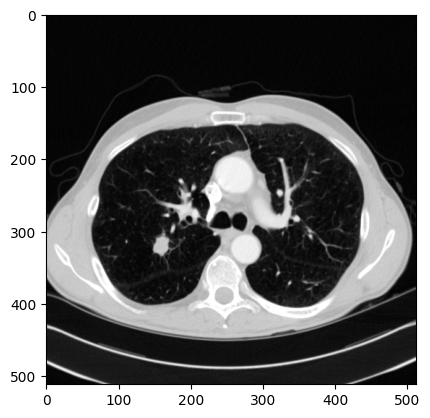

In [ ]:
image =  cv2.imread("lung_img.jpg",0)
plt.imshow(image,cmap='gray')

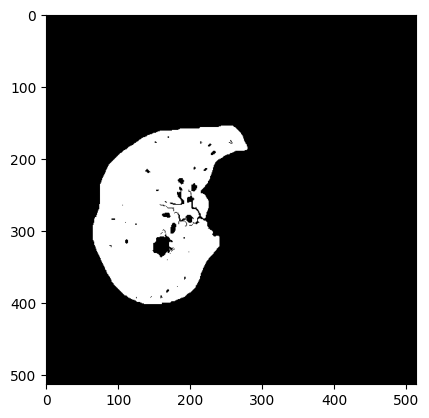

In [ ]:
import cv2
import numpy as np

# Load image in grayscale
#image = cv2.imread('mri_tumor1.jpg',0)

image =  cv2.imread("lung_img.jpg",0)


# Set the seed point manually
#seed_point = (110, 130)  # Change according to the image
seed_point = (150, 200)  # Change according to the image   #Seed point (320,150)

# Define the connectivity (4-way or 8-way)
connectivity = 8 #4

# Define flood fill parameters
mask = np.zeros((image.shape[0] + 2, image.shape[1] + 2), np.uint8)
fill_value = 255  # White color for segmented region
lo_diff, up_diff = 10, 10  # Lower and upper brightness differences

# Apply region growing using floodFill
floodflags = connectivity | cv2.FLOODFILL_MASK_ONLY | (255 << 8)
cv2.floodFill(image, mask, seed_point, fill_value, loDiff=lo_diff, upDiff=up_diff, flags=floodflags)


plt.imshow(mask,cmap='gray')

# Clustering

In [ ]:
from sklearn.cluster import KMeans

image =cv2.imread("lung_img.jpg",0)
pixel_vals = image.reshape((-1,1))

mod=KMeans(n_clusters=3,max_iter=1000)
# We defined 3 cluster. Background will go in one cluster, normal tissues of brain will go under second cluster
# Tumor tisseues will comes under third cluster
mod1=mod.fit(pixel_vals)


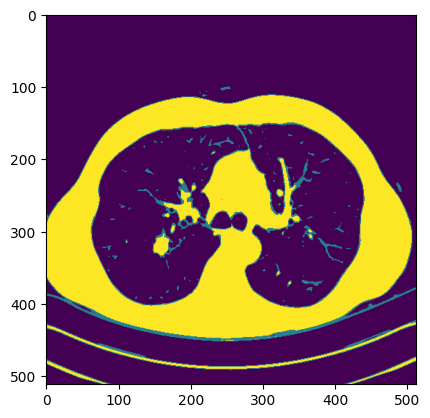

In [ ]:
labels=mod1.labels_
cent=mod1.cluster_centers_
cent=np.uint8(cent)
segmented_data = cent[labels.flatten()]
segmented_image = segmented_data.reshape((image.shape))
plt.imshow(segmented_image)

In [ ]:
ind0=np.where(segmented_data==cent[0])
ind1=np.where(segmented_data==cent[1])
ind2=np.where(segmented_data==cent[2])

In [ ]:
ind0

(array([  5860,   5861,   5862, ..., 160009, 160010, 160015]),
 array([0, 0, 0, ..., 0, 0, 0]))

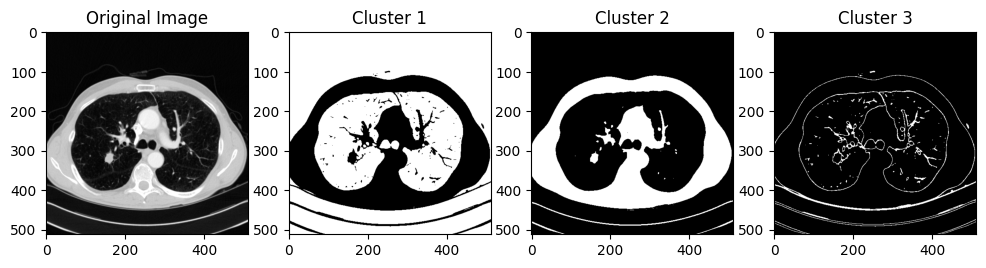

In [ ]:
clust0=segmented_data.copy()
clust0[ind1]=0
clust0[ind2]=0
clust0_image = clust0.reshape((image.shape))

clust1=segmented_data.copy()
clust1[ind0]=0
clust1[ind2]=0
clust1_image = clust1.reshape((image.shape))

clust2=segmented_data.copy()
clust2[ind0]=0
clust2[ind1]=0
clust2_image = clust2.reshape((image.shape))

plt.figure(figsize=(12,10))

plt.subplot(1,4,1)
plt.title('Original Image')
plt.imshow(image,'gray')
plt.subplot(1,4,2)
plt.title('Cluster 1')
plt.imshow(clust0_image,cmap='gray')
plt.subplot(1,4,3)
plt.title('Cluster 2')
plt.imshow(clust1_image,cmap='gray')
plt.subplot(1,4,4)
plt.title('Cluster 3')
plt.imshow(clust2_image,cmap='gray')

# Morphology

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving j.png to j.png


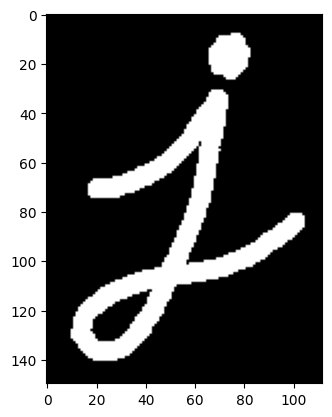

In [ ]:
img=cv2.imread('j.png',0)
plt.imshow(img,cmap='gray')

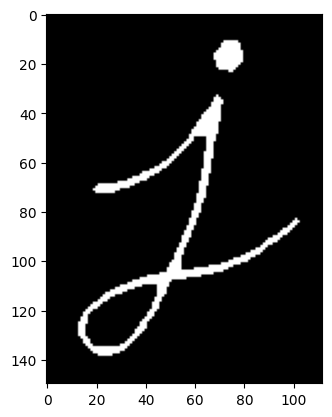

In [ ]:
#erosion
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(erosion,cmap='gray')

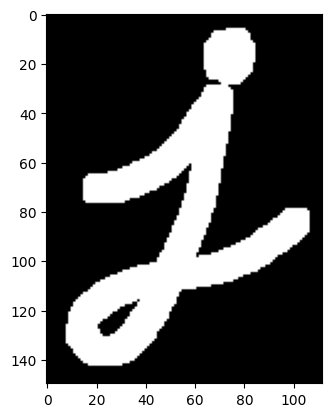

In [ ]:
#dilation
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(dilation,cmap='gray')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving j_o.png to j_o.png


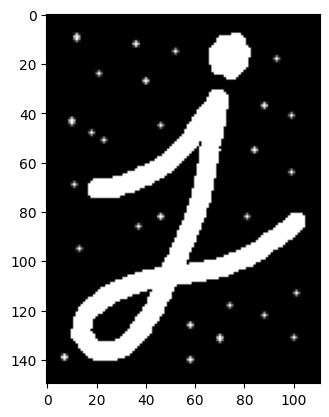

In [ ]:
img=cv2.imread('j_o.png',0)
plt.imshow(img,cmap='gray')

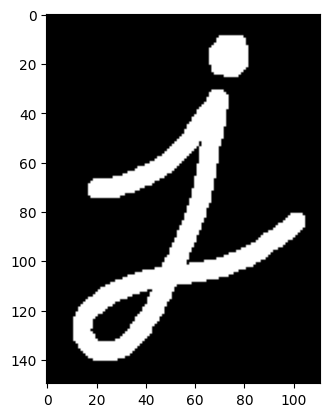

In [ ]:
#Open
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving j_c.png to j_c.png


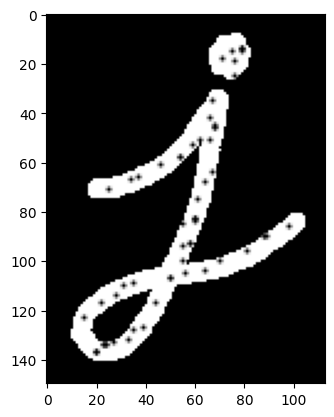

In [ ]:
img=cv2.imread('j_c.png',0)
plt.imshow(img,cmap='gray')

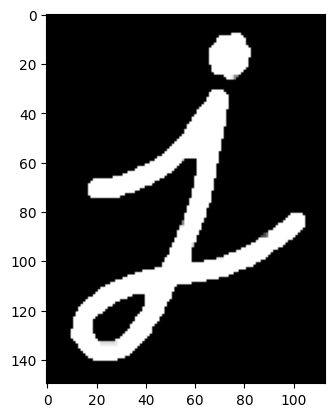

In [ ]:
#closing
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')

(387, 434)


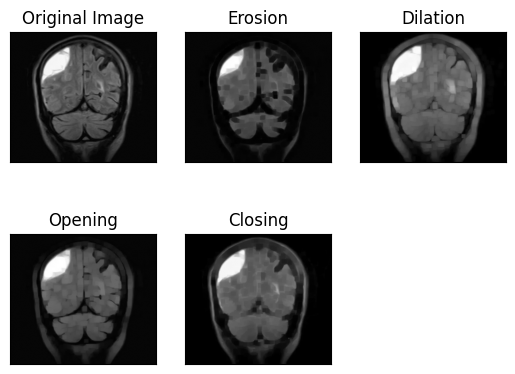

In [ ]:
# Load an image
image = cv2.imread("mri_tumor1.jpg",0)
print(image.shape)

# Define a kernel (structuring element)
kernel = np.ones((10,10), np.uint8)

# Erosion
erosion = cv2.erode(image, kernel, iterations=1)

# Dilation
dilation = cv2.dilate(image, kernel, iterations=1)

# Opening (erosion followed by dilation)
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Closing (dilation followed by erosion)
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Display the results
titles = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing']
images = [image, erosion, dilation, opening, closing]

for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

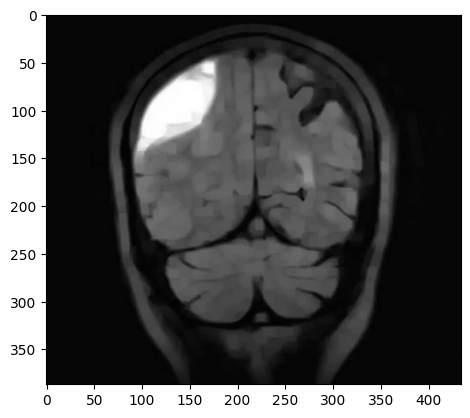

In [ ]:
img = cv2.imread("mri_tumor1.jpg",0)
se1=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
mask=cv2.morphologyEx(img,cv2.MORPH_OPEN,se1)
plt.imshow(mask,cmap='gray')

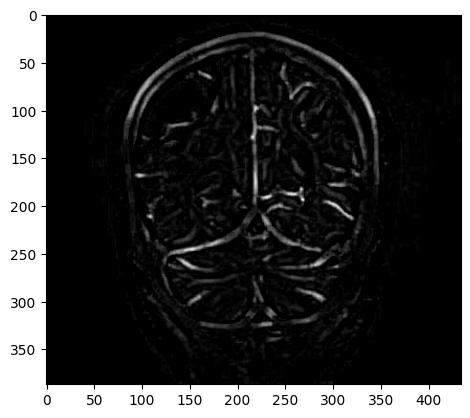

In [ ]:
img = cv2.imread("mri_tumor1.jpg",0)
se1=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
mask = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,se1)
plt.imshow(mask,cmap='gray')

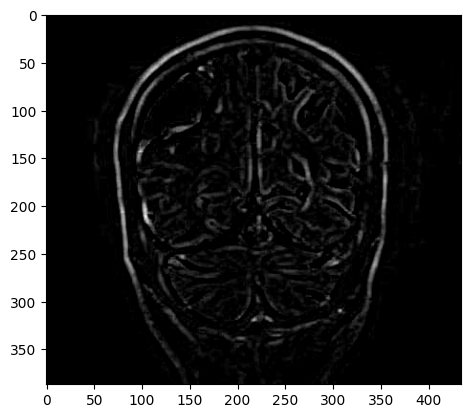

In [ ]:
img = cv2.imread("mri_tumor1.jpg",0)
se1=cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))
mask = cv2.morphologyEx(img,cv2.MORPH_TOPHAT,se1)
plt.imshow(mask,cmap='gray')

# ACTIVE CONTOUR

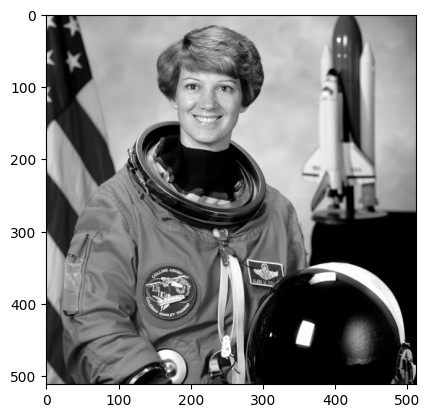

In [ ]:
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)
plt.imshow(img,cmap='gray')

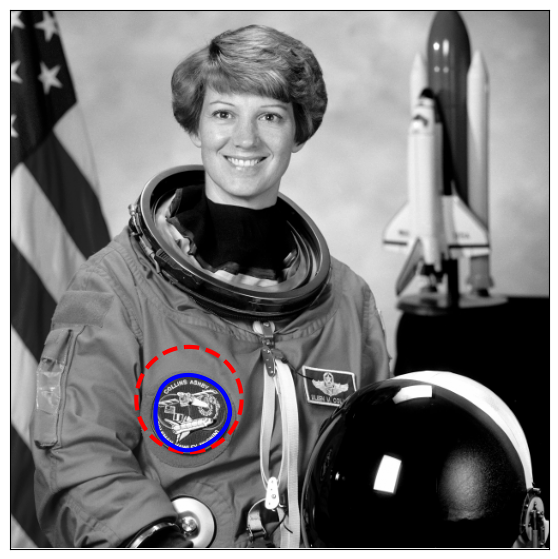

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2 * np.pi, 400)
r =  370 + 50 * np.sin(s) #150+160
c =  170 + 50 * np.cos(s)  #415+75
init = np.array([r, c]).T

snake = active_contour(
    gaussian(img, sigma=3, preserve_range=False),
    init,
    alpha=0.02,
    beta=510,
    gamma=0.0008,
)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

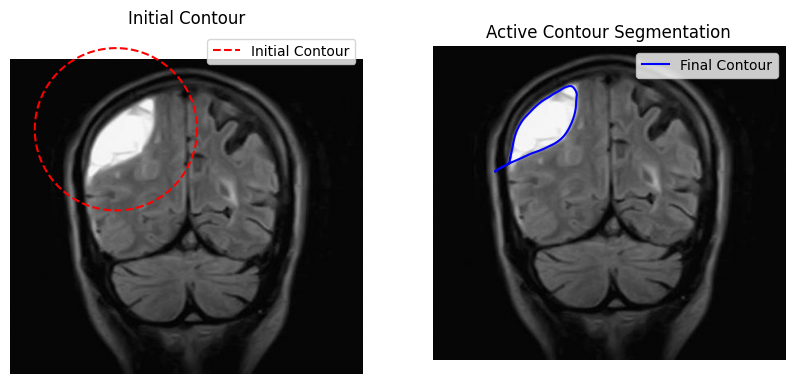

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import cv2

# Load the image
image =  cv2.imread("mri_tumor1.jpg",0)
gray_image = image

# Smooth the image to reduce noise
smoothed_image = gaussian(gray_image, sigma=2)

# # Define initial contour (circle around the object)
s = np.linspace(0, 2*np.pi, 400)
x = 130+ 100*np.cos(s)  # X-coordinates of initial contour
y = 85 + 100*np.sin(s)  # Y-coordinates of initial contour
init_contour = np.array([x, y]).T  # Transpose to (N, 2) shape

# Apply Active Contour Model
snake = active_contour(smoothed_image, init_contour, alpha=0.005, beta=30, gamma=0.001)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_image, cmap='gray')
ax[0].plot(init_contour[:, 0], init_contour[:, 1], '--r', label="Initial Contour")
ax[0].set_title('Initial Contour')

ax[1].imshow(gray_image, cmap='gray')
ax[1].plot(snake[:, 1], snake[:, 0], '-b', label="Final Contour")
ax[1].set_title('Active Contour Segmentation')

for a in ax:
    a.axis("off")
    a.legend()

plt.show()
